In [60]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

In [61]:
# initialize
path_config="gpu.config.yml"
cfg = OmegaConf.load(path_config)
analyzer = FaceAnalyzer(cfg.analyzer)


{"asctime": "2024-03-18 00:22:26,749", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-03-18 00:22:26,750", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-03-18 00:22:26,762", "levelname": "INFO", "message": "Initializing FaceDetector"}


{"asctime": "2024-03-18 00:22:27,106", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-03-18 00:22:27,116", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-03-18 00:22:27,117", "levelname": "INFO", "message": "Initializing FacePredictor embed"}


In [62]:
path_img_input="./test_error_1/frame_0.png"


In [63]:
response=None
# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=False,
        include_tensors=True,
    )

{"asctime": "2024-03-18 00:22:27,369", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-18 00:22:27,370", "levelname": "INFO", "message": "Reading image", "input": "./test_error_1/frame_0.png"}
{"asctime": "2024-03-18 00:22:27,378", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-18 00:22:27,570", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-18 00:22:27,571", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-18 00:22:27,572", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-18 00:22:27,572", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-18 00:22:27,629", "levelname": "INFO", "message": "Utilizing facial features"}


In [64]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
    )

{"asctime": "2024-03-18 00:22:27,636", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-18 00:22:27,638", "levelname": "INFO", "message": "Reading image", "input": "./test_error_1/frame_0.png"}
{"asctime": "2024-03-18 00:22:27,644", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-18 00:22:28,019", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-18 00:22:28,020", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-18 00:22:28,021", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-18 00:22:28,022", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-18 00:22:28,136", "levelname": "INFO", "message": "Utilizing facial features"}


In [65]:
import os
input_dir = "./test_error_2"
# Get a list of all image files in the "./test" directory
image_files = [file for file in os.listdir(input_dir) if file.endswith(".png")]

# Create an empty dictionary to store the responses
responses_dict = {}

# Iterate over each image file
for image_file in image_files:
    # Get the full path of the image file
    image_path = os.path.join(input_dir, image_file)
    
    # Run the analyzer on the image
    response = analyzer.run(
        path_image=image_path,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
    )
    
    # Add the response to the dictionary with the image file name as the key
    responses_dict[image_file] = response.faces[0].preds["embed"].logits
responses_dict = dict(sorted(responses_dict.items(), key=lambda x: int(''.join(filter(str.isdigit, x[0])))))

# Print the dictionary of responses
#print(responses_dict)


{"asctime": "2024-03-18 00:22:28,146", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-18 00:22:28,147", "levelname": "INFO", "message": "Reading image", "input": "./test_error_2/frame_1200.png"}
{"asctime": "2024-03-18 00:22:28,155", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-18 00:22:28,253", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-18 00:22:28,254", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-18 00:22:28,255", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-18 00:22:28,255", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-18 00:22:28,264", "levelname": "INFO", "message": "Utilizing facial features"}
{"asctime": "2024-03-18 00:22:28,265", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-18 00:22:28,265", "levelname": "INFO", "message": "Reading image", "input": "./test

In [66]:
import operator
from torch.nn.functional import cosine_similarity

# Create an empty similarity matrix
similarity_matrix = {}

# Iterate over each pair of keys in responses_dict
for key_1, value_1 in responses_dict.items():
    for key_2, value_2 in responses_dict.items():
        # Calculate the cosine similarity between value_1 and value_2
        similarity = cosine_similarity(value_1, value_2, dim=0).item()
        
        # Add the similarity to the similarity matrix with the key pair as the key
        similarity_matrix[key_1 + "+" + key_2] = similarity

# Print the similarity matrix
print(similarity_matrix)




{'frame_0.png+frame_0.png': 1.0000001192092896, 'frame_0.png+frame_30.png': -0.013090286403894424, 'frame_0.png+frame_60.png': 0.04499785602092743, 'frame_0.png+frame_90.png': -0.06546879559755325, 'frame_0.png+frame_120.png': 0.04631650075316429, 'frame_0.png+frame_150.png': -0.008560534566640854, 'frame_0.png+frame_180.png': -0.060757216066122055, 'frame_0.png+frame_210.png': -0.031053120270371437, 'frame_0.png+frame_240.png': -0.046692054718732834, 'frame_0.png+frame_270.png': -0.0443054735660553, 'frame_0.png+frame_300.png': 0.5634797811508179, 'frame_0.png+frame_330.png': 0.35404878854751587, 'frame_0.png+frame_360.png': 0.37200289964675903, 'frame_0.png+frame_390.png': 0.31279098987579346, 'frame_0.png+frame_420.png': 0.26467597484588623, 'frame_0.png+frame_450.png': 0.2599574327468872, 'frame_0.png+frame_480.png': 0.26784926652908325, 'frame_0.png+frame_510.png': 0.2887428104877472, 'frame_0.png+frame_540.png': 0.30323368310928345, 'frame_0.png+frame_570.png': 0.3225551843643188

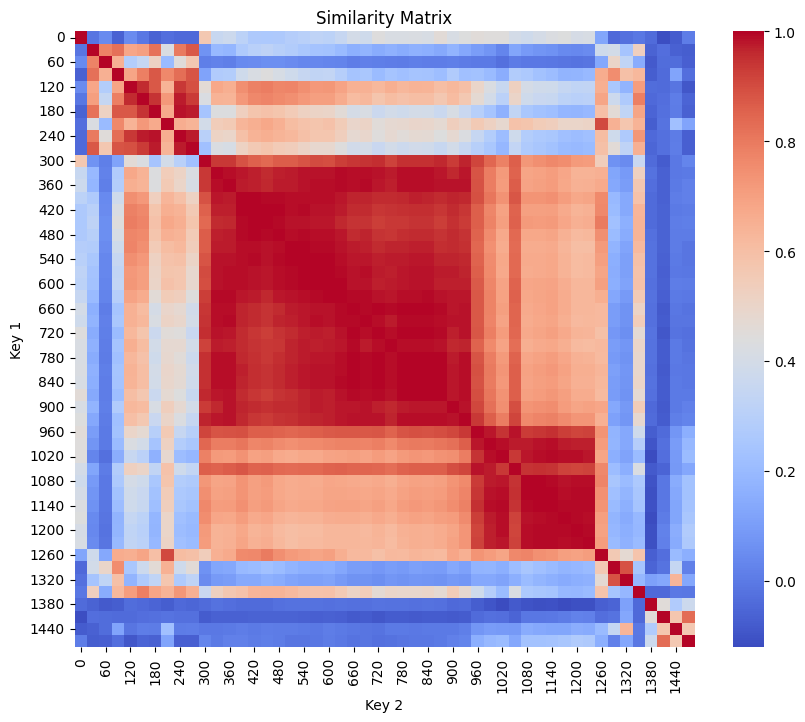

In [67]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the similarity matrix to a dataframe
similarity_df = pd.DataFrame.from_dict(similarity_matrix, orient='index')

# Reset the index and split the key pair into separate columns
similarity_df.reset_index(inplace=True)
similarity_df[['key_1', 'key_2']] = similarity_df['index'].str.split('+', expand=True)
# Convert the key_1 and key_2 columns to numeric type
similarity_df['key_1'] = similarity_df['key_1'].str.extract('(\d+)', expand=False).astype(int)
similarity_df['key_2'] = similarity_df['key_2'].str.extract('(\d+)', expand=False).astype(int)

# Sort the dataframe by key_1 and key_2 columns
similarity_df = similarity_df.sort_values(['key_1', 'key_2'])


# Pivot the dataframe to create a matrix-like structure
similarity_matrix_df = similarity_df.pivot(index='key_1', columns='key_2', values=0)

# Create a heatmap of the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_df, cmap='coolwarm', fmt=".2f")
plt.title('Similarity Matrix')
plt.xlabel('Key 2')
plt.ylabel('Key 1')
plt.show()

